## Refrences
- https://www.kaggle.com/datasets/mysarahmadbhat/ford-used-car-listing
- https://github.com/youjin2/mlops/blob/main/bentoml/examples/streamlit-bentoml/notebooks/01_eda_pawpularity_dataset.ipynb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read dataset
- model: FORD model
- year: registration year
- price: prices in Euros
- transmission: type of gear box
- mileage: distance used
- fuelType: engine fuel
- tax: road tax
- mpg: miles per galoon
- engingSize: size in litres

In [2]:
data = pd.read_csv("../data/ford.csv")

In [3]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
'''
basic statistics
'''

data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [5]:
'''
check data shape
'''

data.shape

(17965, 9)

In [6]:
'''
check missing values
'''

data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

## Target distribution

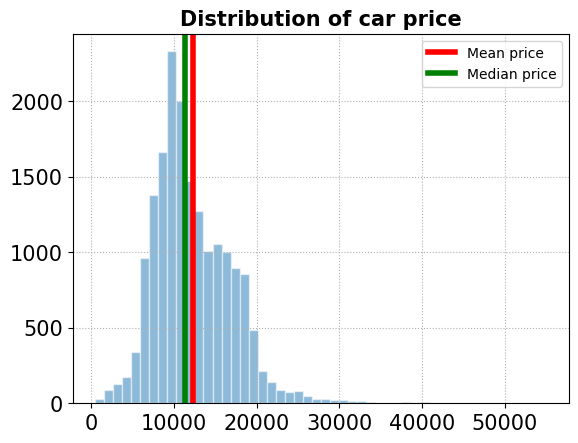

In [7]:
tmp = data.price.copy()
mean_price = tmp.mean()
median_price = tmp.median()

fig, ax = plt.subplots(1, 1)

ax.hist(tmp, bins=50, alpha=0.5, edgecolor="white")
ax.grid(linestyle=":")

ax.set_title("Distribution of car price", weight="bold", size=15)
ax.tick_params(labelsize=15)
ax.axvline(mean_price, lw=4, color="r", label="Mean price")
ax.axvline(median_price, lw=4, color="green", label="Median price")

ax.legend()

## Input distribution

In [8]:
conti_cols = ["year", "mileage", "tax", "mpg", "engineSize"]

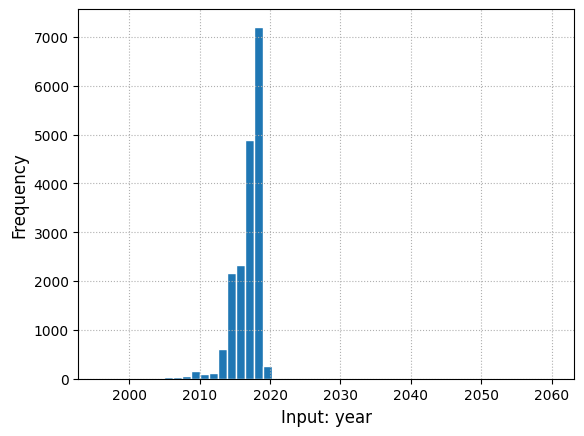

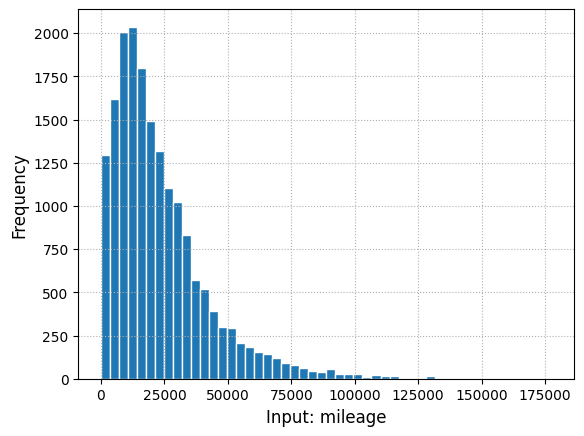

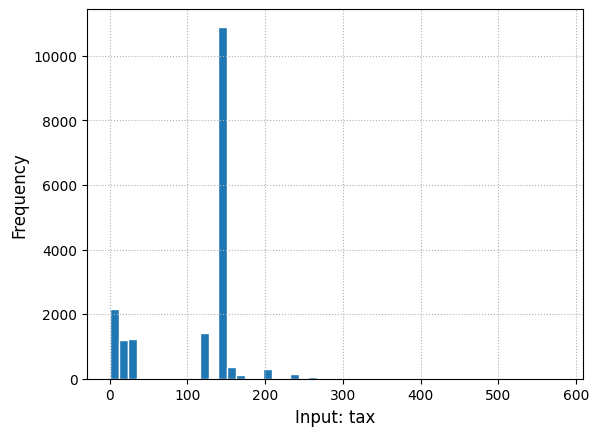

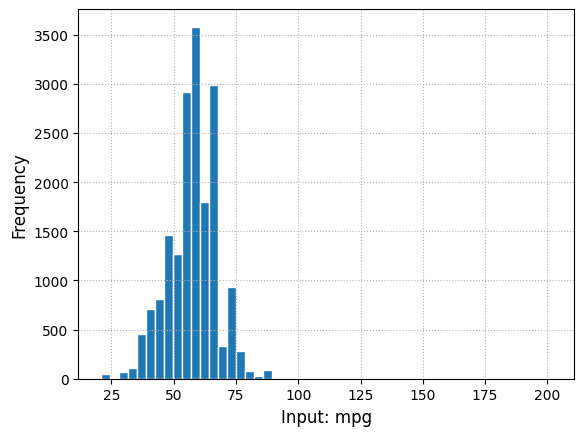

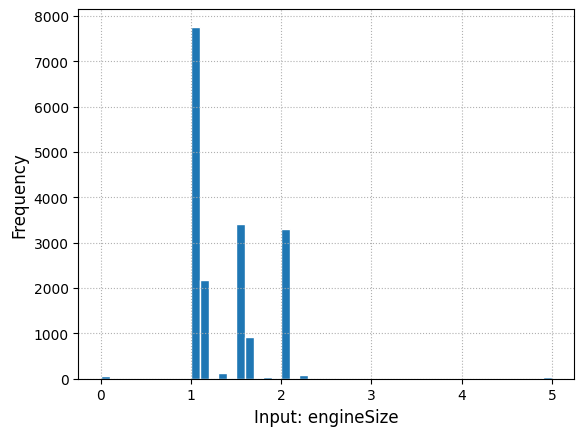

In [9]:
for c in conti_cols:
    tmp = data[c].copy()
    
    fig, ax = plt.subplots(1, 1)
    ax.hist(tmp, bins=50, edgecolor="white")
    ax.grid(linestyle=":")
    ax.set_xlabel(f"Input: {c}", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

## Correlation between target & inputs

In [10]:
'''
pairwise correlations between [Target] + [Continous Inputs]
'''

corrs = data[["price"] + conti_cols].corr()
corrs.style.background_gradient(cmap='coolwarm')

,price,year,mileage,tax,mpg,engineSize
price,1.000000,0.635994,-0.530727,0.406821,-0.346427,0.411156
year,0.635994,1.000000,-0.707899,0.298457,-0.022969,-0.137358
mileage,-0.530727,-0.707899,1.000000,-0.260550,0.120077,0.215001
tax,0.406821,0.298457,-0.260550,1.000000,-0.503013,0.184311
mpg,-0.346427,-0.022969,0.120077,-0.503013,1.000000,-0.260527
engineSize,0.411156,-0.137358,0.215001,0.184311,-0.260527,1.000000


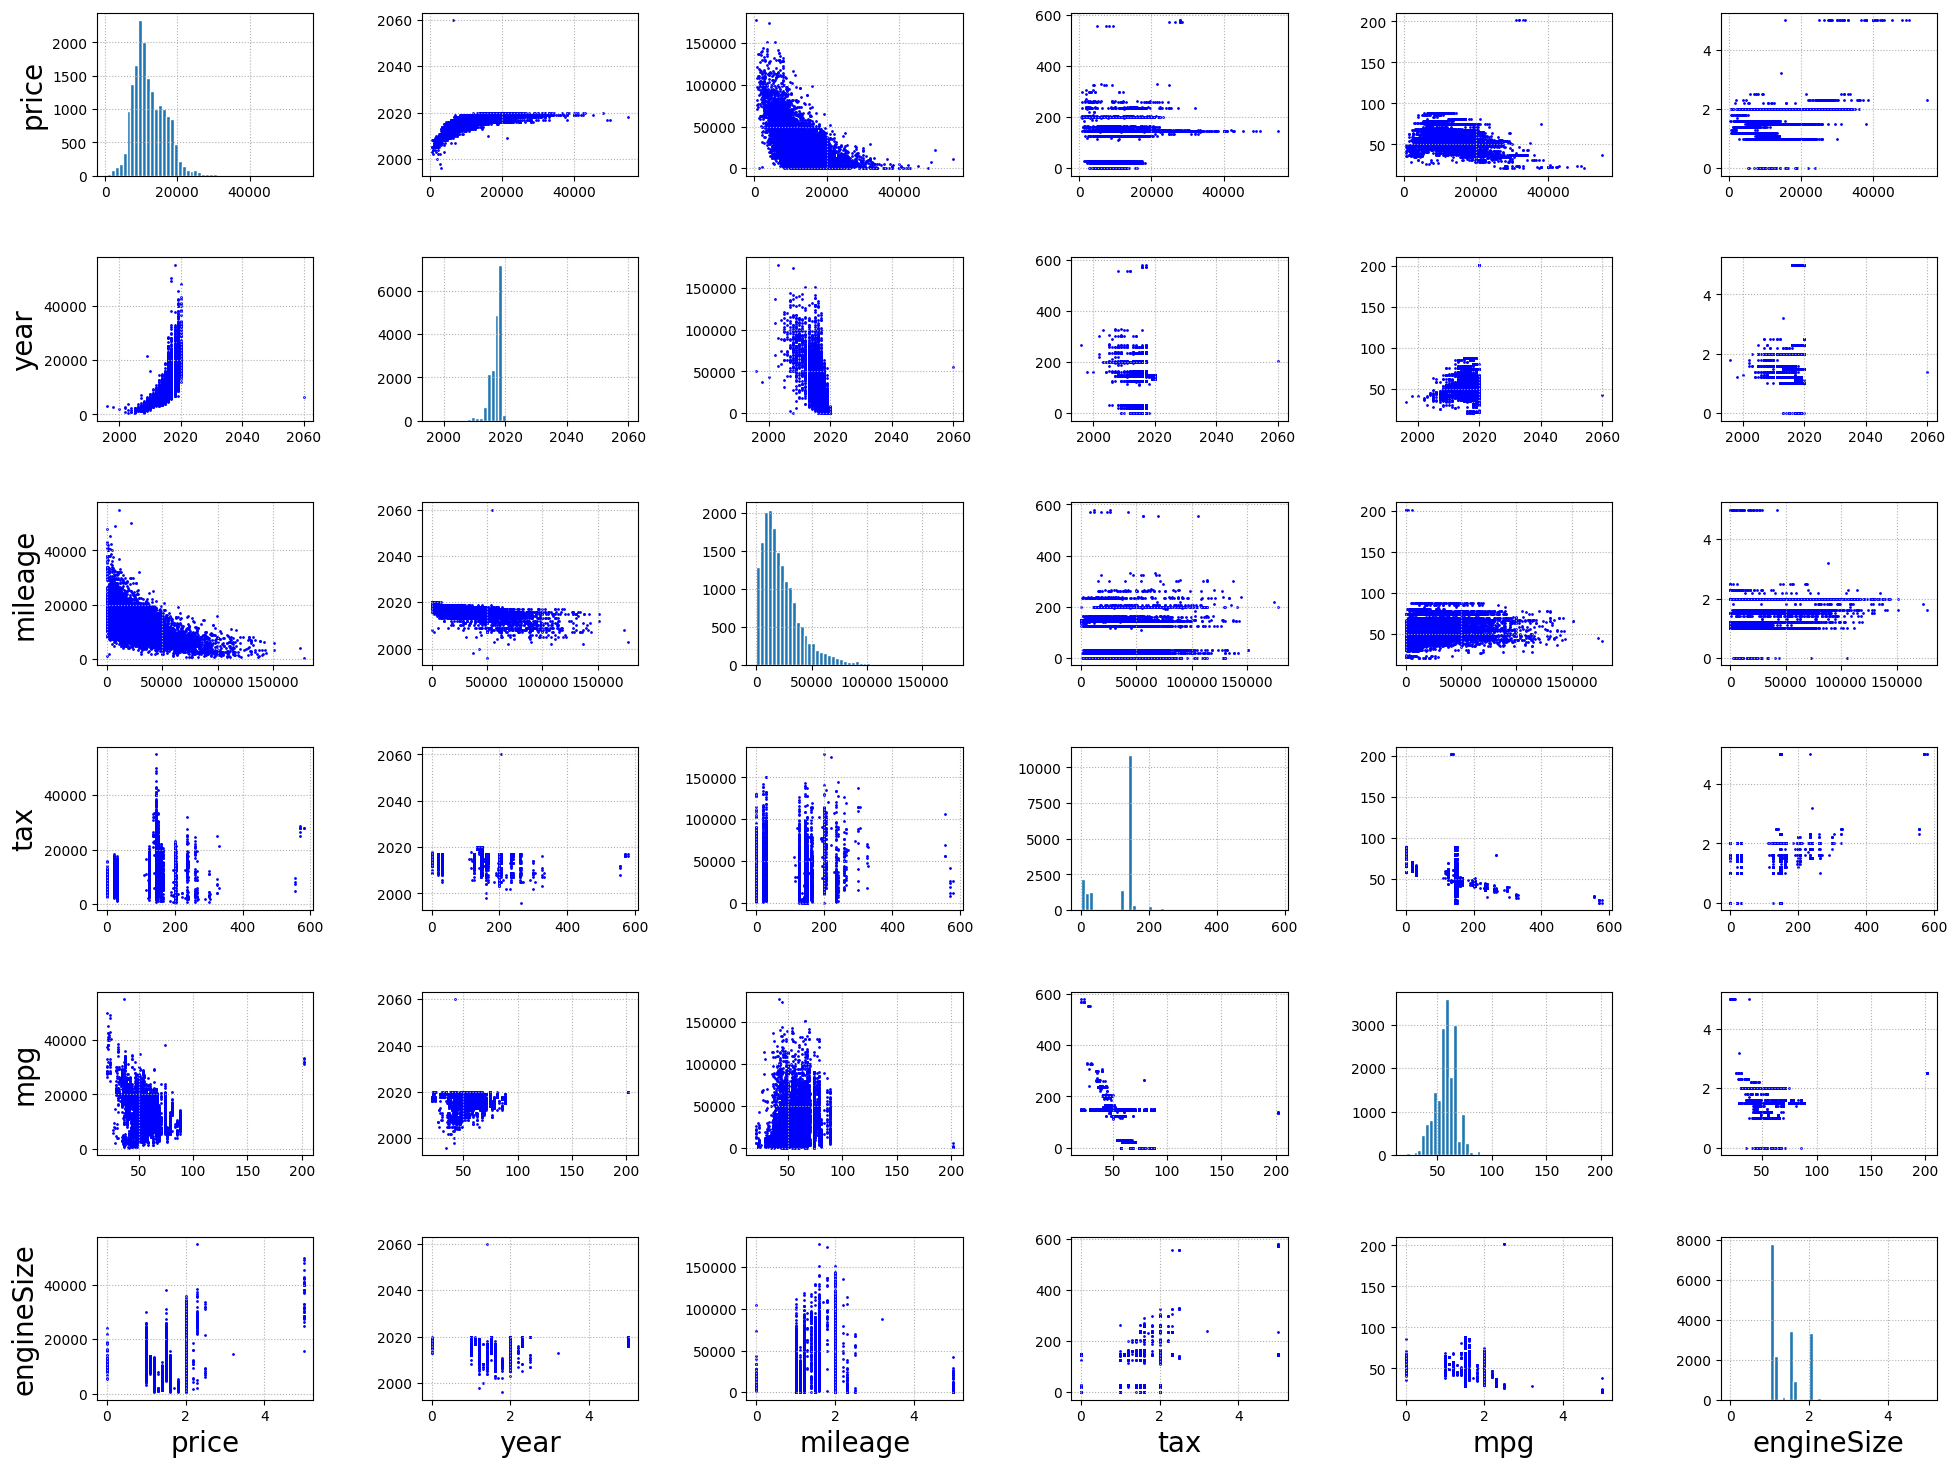

In [11]:
'''
scatter plot 
'''

tmp = data[["price"] + conti_cols].copy()
n = len(tmp.columns)

fig, axs = plt.subplots(n, n)
for rn in range(n):
    for cn in range(n):
        # data
        x = tmp.iloc[:, rn]
        y = tmp.iloc[:, cn]
        
        ax = axs[rn, cn]
        
        # histogram for diagonal elements
        if rn == cn:
            ax.hist(x, bins=50, edgecolor="white")            
        # scatter for off-diagonal elements
        else:
            ax.scatter(x, y, s=1, color="b")
            
        ax.grid(linestyle=":")
        
        if cn == 0:
            ax.set_ylabel(tmp.columns[rn], fontsize=20)
            
        if rn == (n-1):
            ax.set_xlabel(tmp.columns[cn], fontsize=20)
        
        
fig.subplots_adjust(right=3, top=3, wspace=0.5, hspace=0.5)

## Categorical inputs

In [12]:
'''
model names
- sparse value exists and we won't be able to use one-hot encoding feature for this.
'''

data.groupby(["model"]).price.describe(percentiles=[0.5])

,count,mean,std,min,50%,max
model,,,,,,
B-MAX,355.0,8287.526761,1754.847361,4499.0,8300.0,12499.0
C-MAX,543.0,9914.567219,2556.454220,1775.0,10000.0,17995.0
EcoSport,1143.0,12499.268591,3182.153932,6420.0,12200.0,22450.0
Edge,208.0,22810.500000,5070.270802,14998.0,20987.0,36000.0
Escort,1.0,3000.000000,NaN,3000.0,3000.0,3000.0
Fiesta,6557.0,10196.298002,2888.952250,694.0,9995.0,25999.0
Focus,4588.0,13185.882956,4509.766122,495.0,12790.0,54995.0
Fusion,16.0,2555.812500,862.361813,1450.0,2443.0,4750.0
Galaxy,228.0,17841.872807,5101.977891,1995.0,18000.0,29499.0


In [13]:
'''
transmission types
- this could be a nice feature for predicting car price.
'''

data.groupby(["transmission"]).price.describe(percentiles=[0.5])

,count,mean,std,min,50%,max
transmission,,,,,,
Automatic,1361.0,15727.234386,5964.420319,1475.0,15698.0,48999.0
Manual,15517.0,11792.490043,4319.125002,495.0,10991.0,54995.0
Semi-Auto,1087.0,14919.034039,5960.449046,4990.0,13689.0,42000.0


In [14]:
'''
fuel types
- sparse value exists and we won't be able to use one-hot encoding feature for this.
'''

data.groupby(["fuelType"]).price.describe(percentiles=[0.5])

,count,mean,std,min,50%,max
fuelType,,,,,,
Diesel,5762.0,13659.173724,5153.208896,675.0,13289.0,38015.0
Electric,2.0,15737.500000,335.875721,15500.0,15737.5,15975.0
Hybrid,22.0,22149.090909,7809.797375,9795.0,23498.5,33500.0
Other,1.0,13800.000000,NaN,13800.0,13800.0,13800.0
Petrol,12178.0,11608.565446,4355.070366,495.0,10800.0,54995.0
